<pre>Experiment No         : 4
Date                  : 15/02/2023</pre>
# <center>Support Vector Machines (SVMs)</center>

### Importing the required packages and reading the dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
df=pd.read_csv("mushrooms.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### Changing Categorical Data to Numerical and Filling any NULL values with Mode of that column

In [3]:
le = LabelEncoder()
for col in df.columns:
    df[col]=le.fit_transform(df[col])

In [4]:
for column in df.columns:
    df[column].fillna(df[column].mode())

In [5]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


## Displaying Outliers

<AxesSubplot:xlabel='cap-shape'>

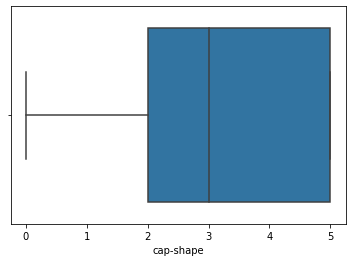

In [6]:
sns.boxplot(x=df['cap-shape'])

## Removing Outliers

In [7]:
Q1=df['cap-shape'].quantile(.25)
Q3=df['cap-shape'].quantile(.75)
IQR=Q3-Q1
low=Q1-1.5*IQR
high=Q3+1.5*IQR
df.loc[(df['cap-shape']<high)&(df['cap-shape']>low)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


## Visualising Features

<AxesSubplot:xlabel='class', ylabel='count'>

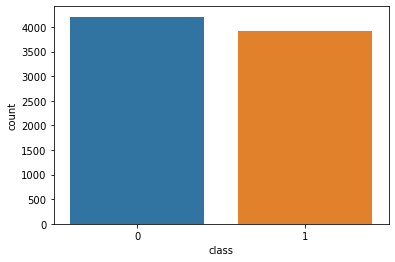

In [23]:
sns.countplot(x=df['class'])

<AxesSubplot:ylabel='cap-shape'>

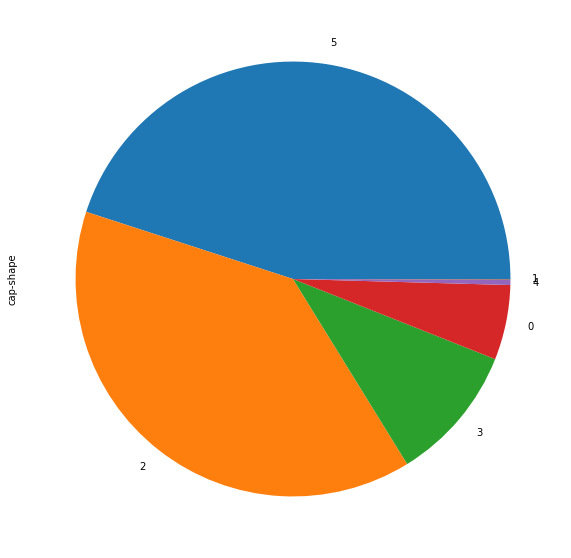

In [30]:
df['cap-shape'].value_counts().plot(kind='pie',figsize=(10,10))

<AxesSubplot:xlabel='population', ylabel='habitat'>

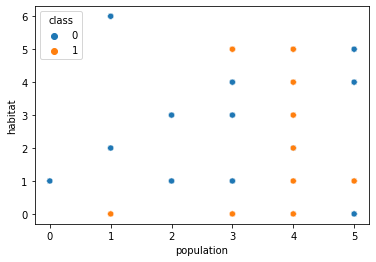

In [32]:
sns.scatterplot(df['population'],df['habitat'],hue=df['class'])


## Apply MinMax Scaling

In [8]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
encD = pd.DataFrame(scaled, columns= df.columns)
encD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   class                     8124 non-null   float64
 1   cap-shape                 8124 non-null   float64
 2   cap-surface               8124 non-null   float64
 3   cap-color                 8124 non-null   float64
 4   bruises                   8124 non-null   float64
 5   odor                      8124 non-null   float64
 6   gill-attachment           8124 non-null   float64
 7   gill-spacing              8124 non-null   float64
 8   gill-size                 8124 non-null   float64
 9   gill-color                8124 non-null   float64
 10  stalk-shape               8124 non-null   float64
 11  stalk-root                8124 non-null   float64
 12  stalk-surface-above-ring  8124 non-null   float64
 13  stalk-surface-below-ring  8124 non-null   float64
 14  stalk-co

In [9]:
encD.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

#### Splitting the dataset into input and target attributes

In [10]:
cols=['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color']
X=encD[cols]
X.head()
y=encD['class']

#### Splitting the dataset into training and test sets

In [11]:
#Split into train and test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40) 

### Modelling with RBF Kernel

In [12]:
svc=SVC() 

svc.fit(X_train,y_train) 
y_pred=svc.predict(X_test) 

print(f'Model accuracy score (RBF kernel) : {accuracy_score(y_test, y_pred):0.4f}') 

Model accuracy score (RBF kernel) : 0.9988


### Modelling with Polynomial Kernel

In [13]:
poly_svc=SVC(kernel='poly') 

poly_svc.fit(X_train,y_train) 
y_pred_test=poly_svc.predict(X_test) 

print(f'Model accuracy score with polynomial kernel : {accuracy_score(y_test, y_pred_test):0.4f}')

Model accuracy score with polynomial kernel : 1.0000


### Modelling with Sigmoid Kernel

In [14]:
sigmoid_svc=SVC(kernel='sigmoid') 

sigmoid_svc.fit(X_train,y_train) 
y_pred=sigmoid_svc.predict(X_test) 

print(f'Model accuracy score (sigmoid kernel) : {accuracy_score(y_test, y_pred):0.4f}') 

Model accuracy score (sigmoid kernel) : 0.4289


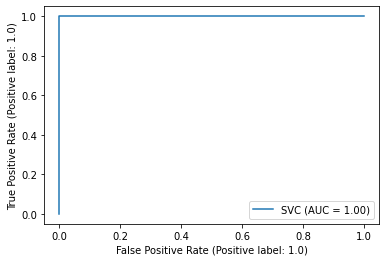

In [21]:
svm=SVC()
svm.fit(X_train, y_train)
metrics.plot_roc_curve(svm, X_test, y_test)
plt.show()

#### Analysing the model performance

In [16]:
from sklearn.metrics import mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay, classification_report

y_train_pred = svc.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred) 
mae_test = mean_absolute_error(y_test, y_pred) 

print(f"Mean Absolute Error of the model in training dataset: {mae_train}")
print(f"Mean Absolute Error of the model in testing dataset : {mae_test}") 

if mae_train < mae_test:
    print("\nThe model is overfit")
else:
    print("\nThe model is underfit")

Mean Absolute Error of the model in training dataset: 0.0021541775657793506
Mean Absolute Error of the model in testing dataset : 0.571076923076923

The model is overfit


##### Confusion Matrix

In [17]:
confusion_matrix(y_test, y_pred)

array([[378, 464],
       [464, 319]])

##### Visualize Confusion Matrix

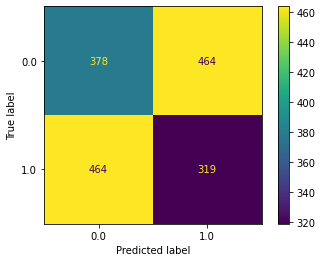

In [18]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, labels=svc.classes_), display_labels=svc.classes_).plot()

##### Classification Report

In [19]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

         0.0       0.45      0.45      0.45       842
         1.0       0.41      0.41      0.41       783

    accuracy                           0.43      1625
   macro avg       0.43      0.43      0.43      1625
weighted avg       0.43      0.43      0.43      1625

